# Time Series Analysis & Forecasting ⌛📈📉

## Stock Price Analysis and prediction of **KOTAK BANK**

### Installing dependencies 

In [1]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 656.2/656.2 kB 17.8 MB/s eta 0:00:00


In [2]:
!pip install missingno

In [3]:
!pip install kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 MB 13.6 MB/s eta 0:00:0000:0100:01


# Imporing libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.dates as mdates
import scipy.stats
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pylab
sns.set(style='white')
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

# Importing the dataset

In [5]:
df = pd.read_csv('KOTAKBANK.csv')

## Exploratory Data Analysis

In [6]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,KOTAKMAH,EQ,212.35,220.0,229.35,220.00,229.35,229.35,229.13,7086,1.623640e+11,NaN,NaN,NaN
1,2000-01-04,KOTAKMAH,EQ,229.35,247.7,247.70,225.25,247.70,246.95,244.12,73681,1.798729e+12,NaN,NaN,NaN
2,2000-01-05,KOTAKMAH,EQ,246.95,229.0,240.00,227.20,228.00,228.40,233.75,105799,2.473093e+12,NaN,NaN,NaN
3,2000-01-06,KOTAKMAH,EQ,228.40,235.1,239.00,217.00,224.95,225.90,226.84,40202,9.119546e+11,NaN,NaN,NaN
4,2000-01-07,KOTAKMAH,EQ,225.90,213.0,219.00,207.85,207.85,208.85,209.94,24463,5.135747e+11,NaN,NaN,NaN


In [7]:
# Exploratory Data Analysis
def eda(data):
    print("Size and shape of the data: ")
    print(data.size)
    print(data.shape)
    print('-'*50)
    print("\nData types of the features: ")
    print(data.dtypes)
    
eda(df)

Size and shape of the data: 
74775
(4985, 15)
--------------------------------------------------

Data types of the features: 
Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object


## Converting date into DateTime format

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index(['Date'], inplace=True)

In [9]:
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,KOTAKMAH,EQ,212.35,220.0,229.35,220.00,229.35,229.35,229.13,7086,1.623640e+11,NaN,NaN,NaN
2000-01-04,KOTAKMAH,EQ,229.35,247.7,247.70,225.25,247.70,246.95,244.12,73681,1.798729e+12,NaN,NaN,NaN
2000-01-05,KOTAKMAH,EQ,246.95,229.0,240.00,227.20,228.00,228.40,233.75,105799,2.473093e+12,NaN,NaN,NaN
2000-01-06,KOTAKMAH,EQ,228.40,235.1,239.00,217.00,224.95,225.90,226.84,40202,9.119546e+11,NaN,NaN,NaN
2000-01-07,KOTAKMAH,EQ,225.90,213.0,219.00,207.85,207.85,208.85,209.94,24463,5.135747e+11,NaN,NaN,NaN


## Data Summary

In [10]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,4985.000000,4985.000000,4985.000000,4985.000000,4985.000000,4985.000000,4985.000000,4.985000e+03,4.985000e+03,2456.000000,4.789000e+03,4789.000000
mean,696.291755,697.154925,708.147543,684.984112,696.556409,696.615135,696.772050,1.283626e+06,1.355506e+14,54912.741857,6.701163e+05,0.514785
std,440.761023,441.037354,445.558375,435.579256,440.924524,440.938692,440.580761,2.486726e+06,3.589591e+14,60401.337897,1.577341e+06,0.166689
min,27.300000,26.950000,30.000000,26.000000,26.500000,27.300000,27.670000,1.050000e+02,4.608250e+08,375.000000,1.002000e+03,0.062300
25%,355.150000,355.000000,366.900000,346.650000,356.000000,355.600000,355.180000,1.855800e+05,5.388055e+12,19646.500000,1.126580e+05,0.401600
50%,650.950000,652.650000,662.000000,638.450000,650.500000,651.200000,651.390000,7.506900e+05,5.000255e+13,33764.500000,3.548760e+05,0.511100
75%,966.400000,967.000000,979.600000,955.250000,968.000000,966.850000,966.270000,1.577817e+06,1.243851e+14,66802.500000,8.194760e+05,0.631900
max,2019.650000,2016.700000,2049.000000,1999.000000,2023.900000,2019.650000,2028.690000,8.385990e+07,1.498222e+16,846705.000000,5.853186e+07,0.990100


## Missing values in the data

In [11]:
def missing_value_table(df):
    mis_val = df.isnull().sum()
    
    mis_val_percent = 100*mis_val/len(df)
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns={0:'Missing Values', 1:'% of Total Values'})
    #sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] !=0].sort_values(
    '% of Total Values', ascending=False).round(1)
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
    return mis_val_table_ren_columns
    

In [12]:
missing_table = missing_value_table(df)
missing_table

Your selected dataframe has 14 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Trades,2529,50.7
Deliverable Volume,196,3.9
%Deliverble,196,3.9


## Visualizing the locations of the missing data

<AxesSubplot:>

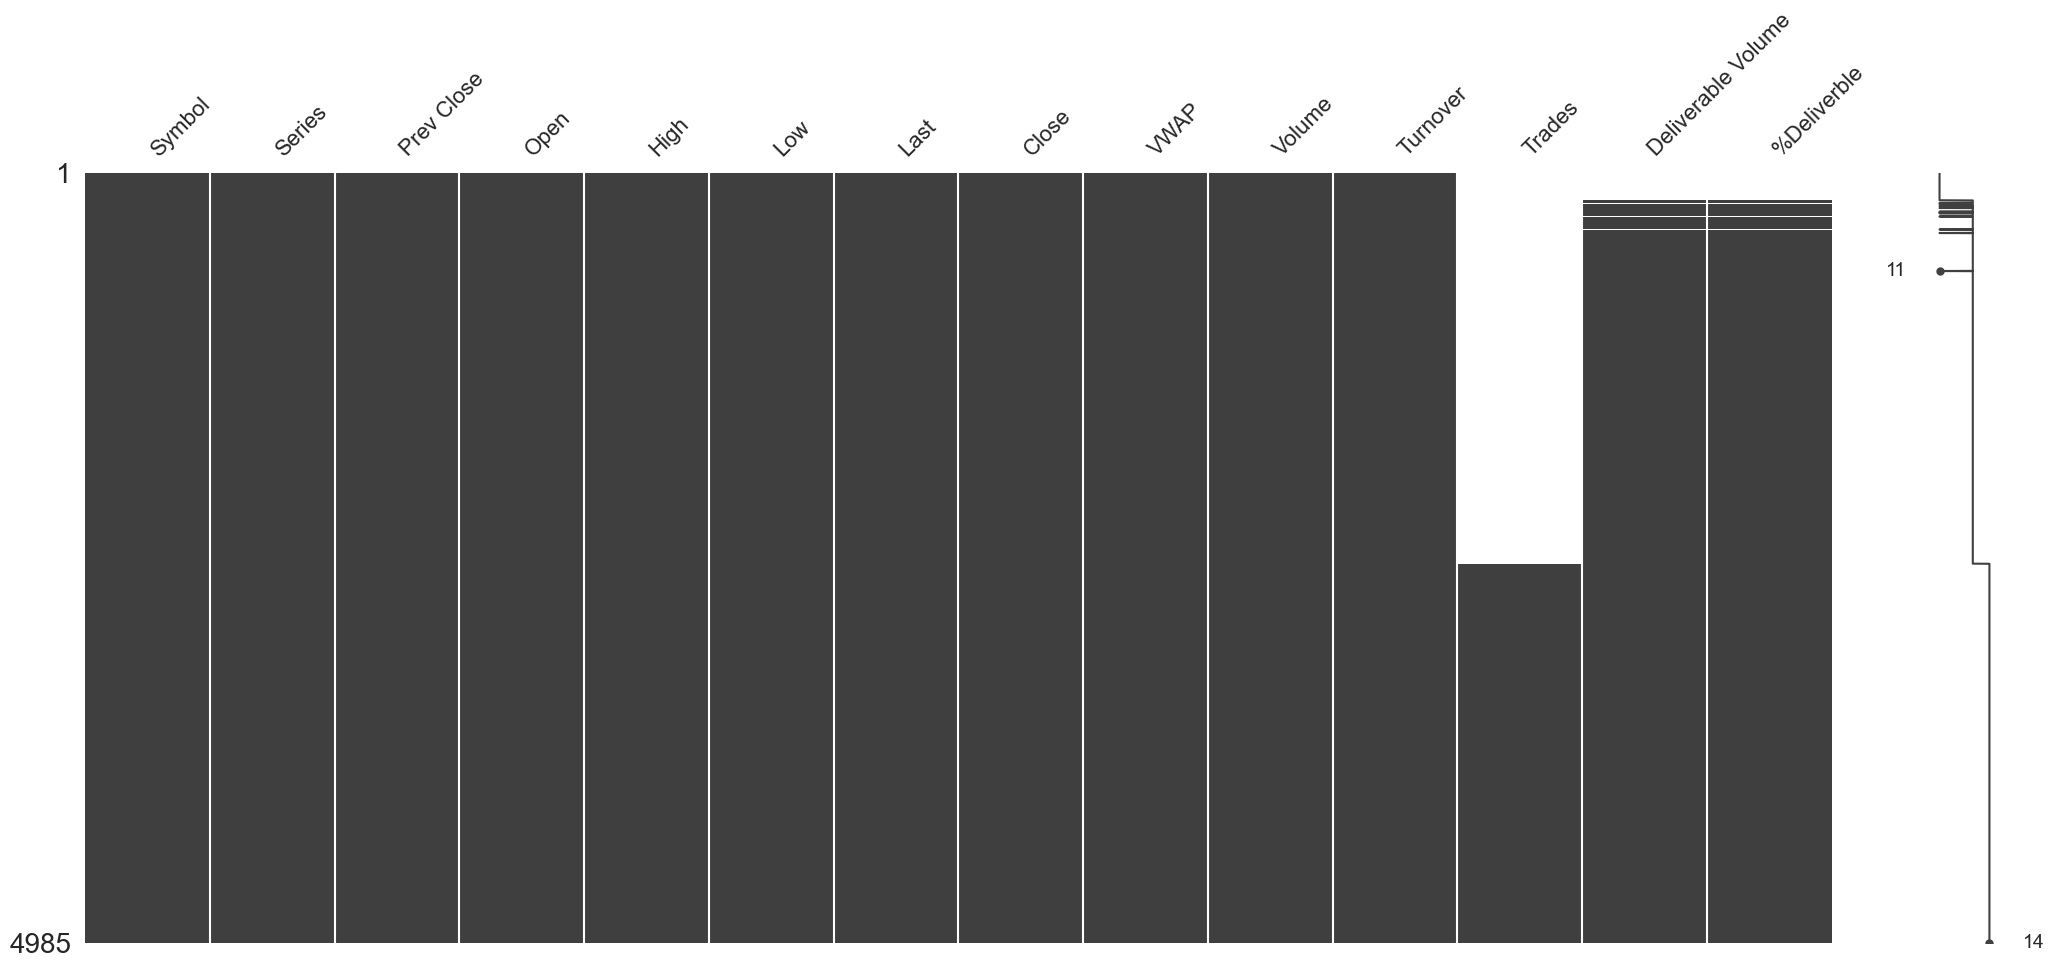

In [13]:
msno.matrix(df)

## Handling missing values

<AxesSubplot:xlabel='Date'>

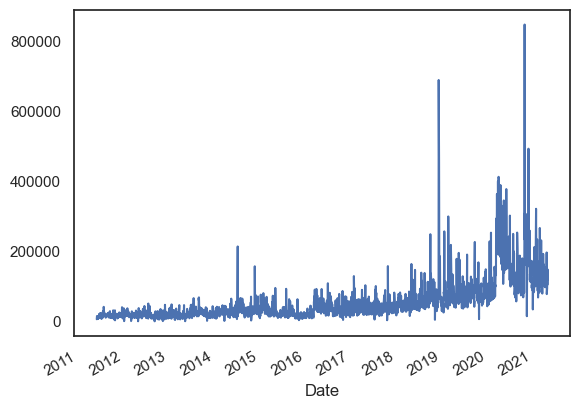

In [14]:
df.Trades.plot()

In [15]:
df.Trades[:2000]

Date
2000-01-03   NaN
2000-01-04   NaN
2000-01-05   NaN
2000-01-06   NaN
2000-01-07   NaN
              ..
2009-04-09   NaN
2009-04-13   NaN
2009-04-15   NaN
2009-04-16   NaN
2009-04-17   NaN
Name: Trades, Length: 2000, dtype: float64

In [16]:
# Removing missing values

df.drop(['Trades', 'Deliverable Volume','%Deliverble'],axis=1,inplace=True)

## Plotting VWAP(Volum Weighted Average Price) over time.

- The Volume Weighted Average Price (VWAP) is used to reveal the true average price that a stock was traded at during any given point in the day. The formula is simply a matter of dividing total dollar volume by total share volume. VWAP = (Number of Shares Bought x Share Price) / Total Volum

In [17]:
import plotly.io as pio
pio.renderers.default = "notebook_connected"


fig = go.Figure([go.Scatter(x=df.index, y=df['VWAP'])])
fig.update_layout(
    autosize = False,
    width = 1000,
    height = 500,
    title ='VMAP over time',
    template='simple_white'
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="VWAP")
fig.show()

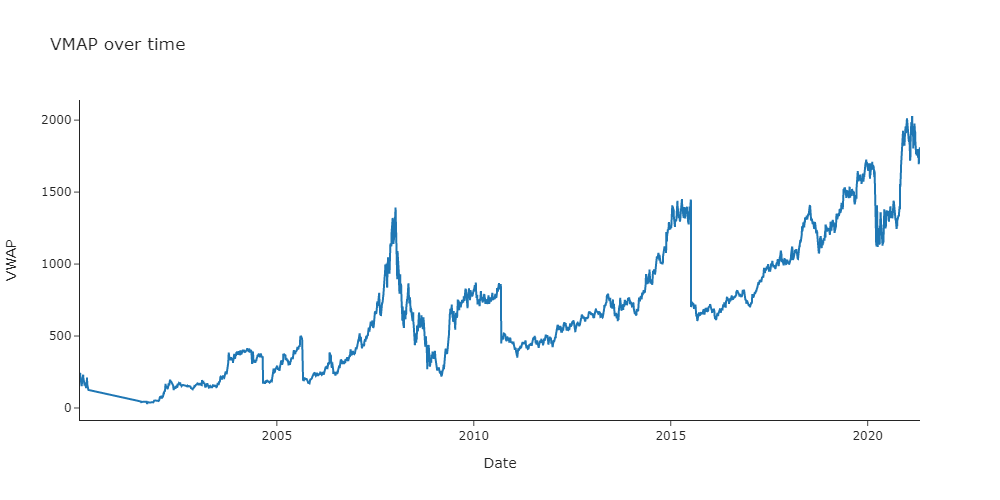

- Stock is failry bullish as we can see the stock performance since its IPO.

- After 2008 there is a fall in prices.
- After 2008's peak,this stock ain't acheive that peak again.
- Since 2008 the prices are steady..

## Visualizing using KDEs

<AxesSubplot:xlabel='VWAP', ylabel='Density'>

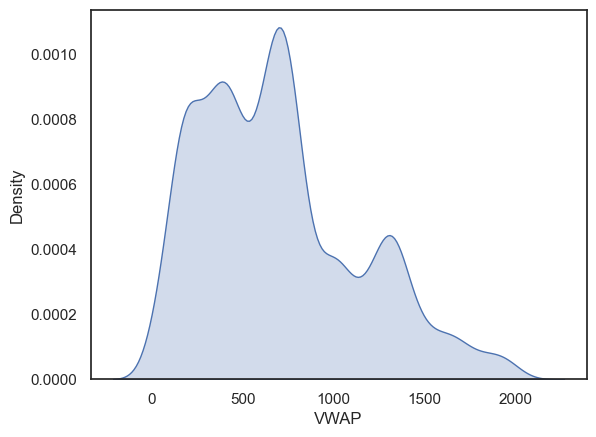

In [18]:
sns.kdeplot(df['VWAP'], shade=True)

- Single peak from this data

## VWAP in 2019

In [19]:
fig = go.Figure([go.Scatter(x=df.loc['2019', 'VWAP'].index, y=df.loc['2020', 'VWAP'])])
fig.update_layout(
    autosize = False,
    width = 1000,
    height=500,
    title='VWAP in 2019',
    template="simple_white"
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title='VWAP')
fig.show()

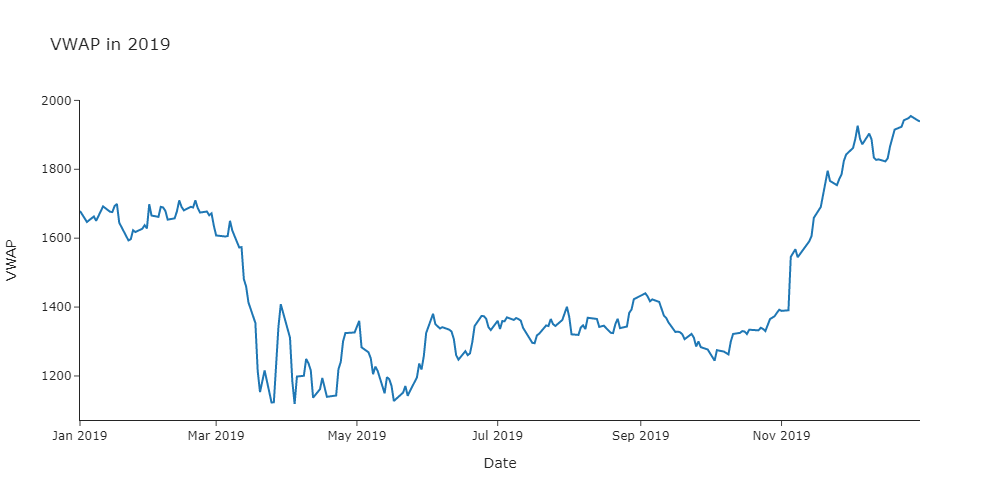

-  From this chart its seems like the stock covered its dip

## VWAP in 2020

In [20]:
fig = go.Figure([go.Scatter(x=df.loc['2020', 'VWAP'].index, y=df.loc['2020', 'VWAP'])])
fig.update_layout(
    autosize = False,
    width = 1000,
    height=500,
    title='VWAP in 2020',
    template="simple_white"
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title='VWAP')
fig.show()

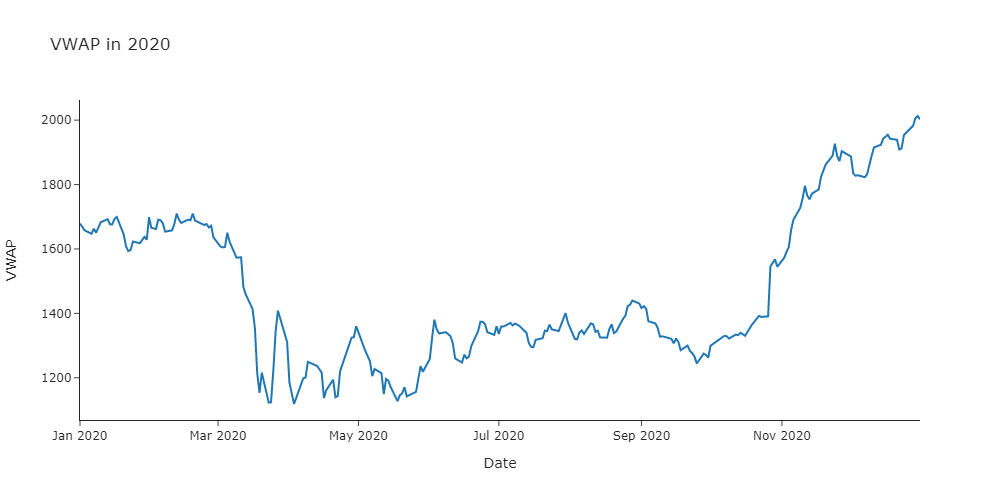

-  Even after first covid pandemic in India. This stock increased massively with higher return.
- For future this stock looks very bullish.

## Open, Close, High, Low price over time.

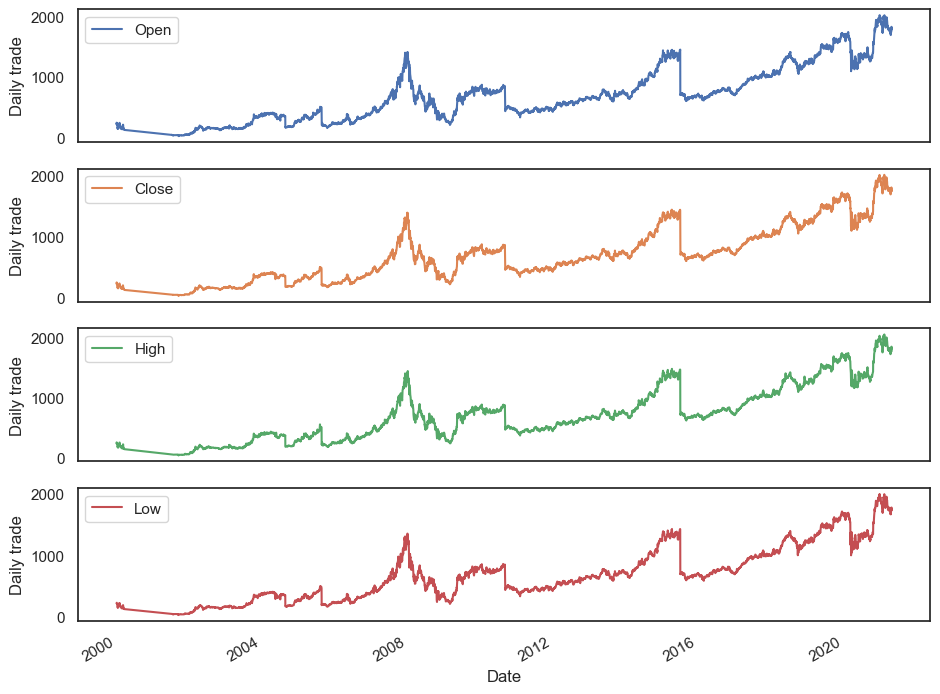

In [21]:
cols_plot = ['Open', 'Close', 'High','Low']
axes = df[cols_plot].plot(figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

- All are the above are following the same trend.
- This stock is very bullish for long term investment.

## Volume over time

In [22]:
fig = go.Figure([go.Scatter(x=df.index, y=df['Volume'])])
fig.update_layout(
    autosize=False,
    width = 1000,
    height = 500,
    template = 'simple_white',
    title='Volume over time'
)
fig.update_xaxes(title='Date')
fig.update_yaxes(title='Volume')
fig.show()

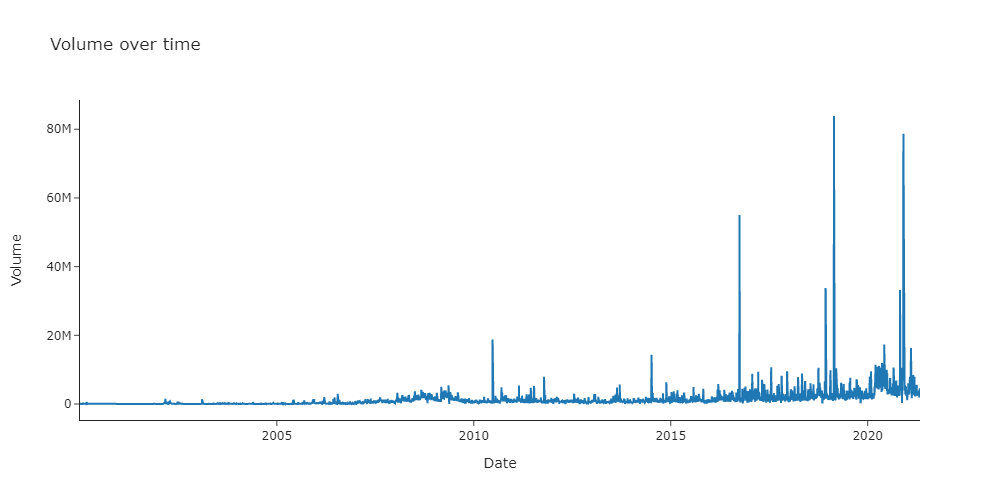

## Volume in 2020

In [23]:
fig = go.Figure([go.Scatter(x=df.loc['2020', 'Volume'].index, y=df.loc['2020', 'Volume'])])
fig.update_layout(
    autosize=False,
    width = 1000,
    height = 500,
    template = 'simple_white',
    title = 'Volume in 2020'
)
fig.update_xaxes(title='Date'),
fig.update_yaxes(title='Volume')
fig.show()

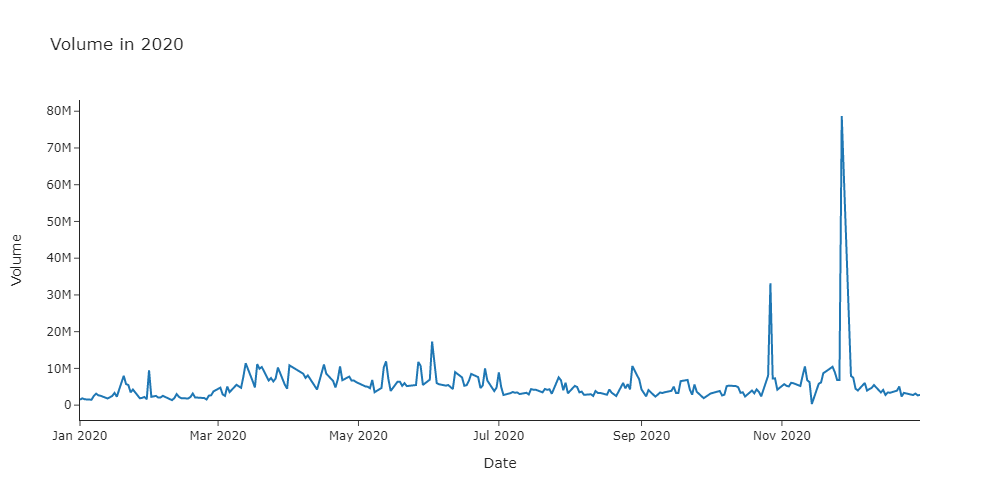

## Q-Q Plot

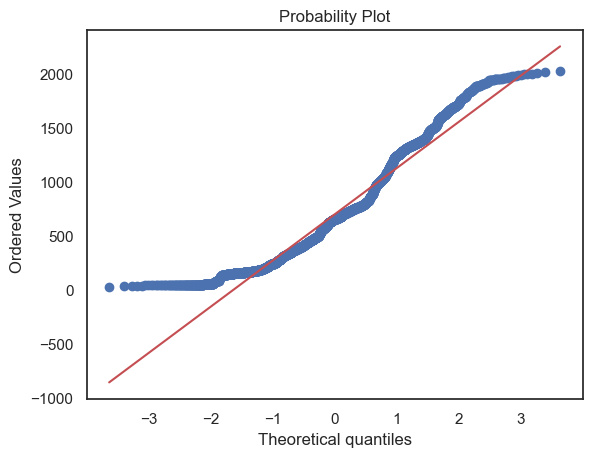

In [24]:
scipy.stats.probplot(df.VWAP, plot=pylab)
pylab.show()

- Data it not normally distributed, however this is what we usually expect from timeseries

## Dicky Fuller Test

The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.

The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

**Null Hypothesis (H0)**: If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

**Alternate Hypothesis (H1)**: The null hypotheis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It has some time dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary. p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [25]:
# Function for Dicky Fuller Test
def dickyFullerTest(x):
    result = adfuller(x)
    print("ADF Statistics: %f"% result[0])
    print("p-value: %f"% result[1])
    print('Critical Value')
    for key, value in result[4].items():
        print('\t%s: %.3f'%(key, value))
    if result[1]>0.05:
        print("Fail to reject null hypothesis(H0), the data is non-stationary.")
    else:
        print("Reject the null hypothesis(H0), the data is stationary.")

In [26]:
dickyFullerTest(df['VWAP'])

ADF Statistics: -0.906425
p-value: 0.785849
Critical Value
	1%: -3.432
	5%: -2.862
	10%: -2.567
Fail to reject null hypothesis(H0), the data is non-stationary.


## Seasonal Decompose

In Python, the statsmodels library has a seasonal_decompose() method that lets you decompose a time series into trend, seasonality and noise in one line of code.
Additive time series

if the components of the time series are added together to make the time series. Then the time series is called the additive time series. By visualization, we can say the time series is additive if the increasing or decreasing pattern of the time series is similar throughout the series. The mathematical function of any additive time series can be represented by:

**y(t) = level + Trend + seasonality + noise**

Multiplicative time series

If the components of the time series are multiplicative together, then the time series is called the multiplicative time series. By visualization, if the time series is having exponential growth or decrement with time then the time series can be considered as the multiplicative time series. The mathematical function of the Multiplicative time series can be represented as.

**y(t) = Level * Trend * seasonality * Noise**


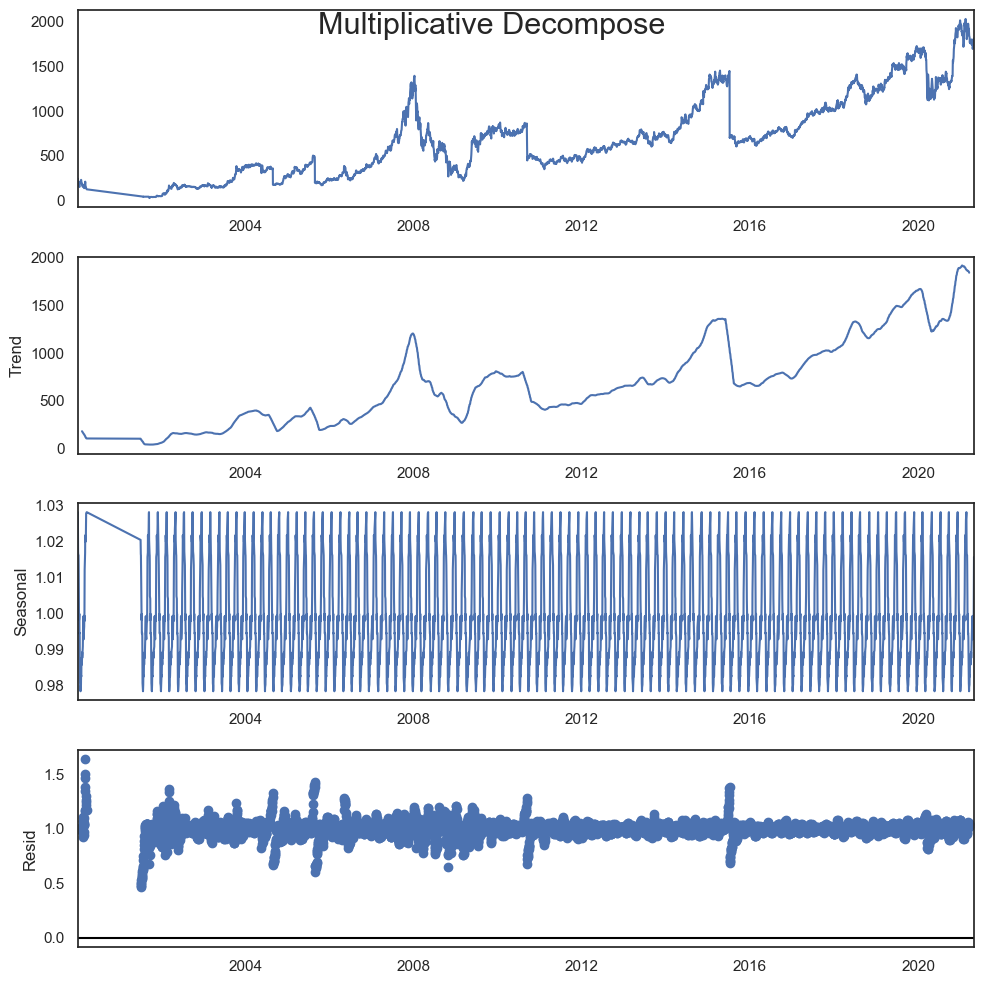

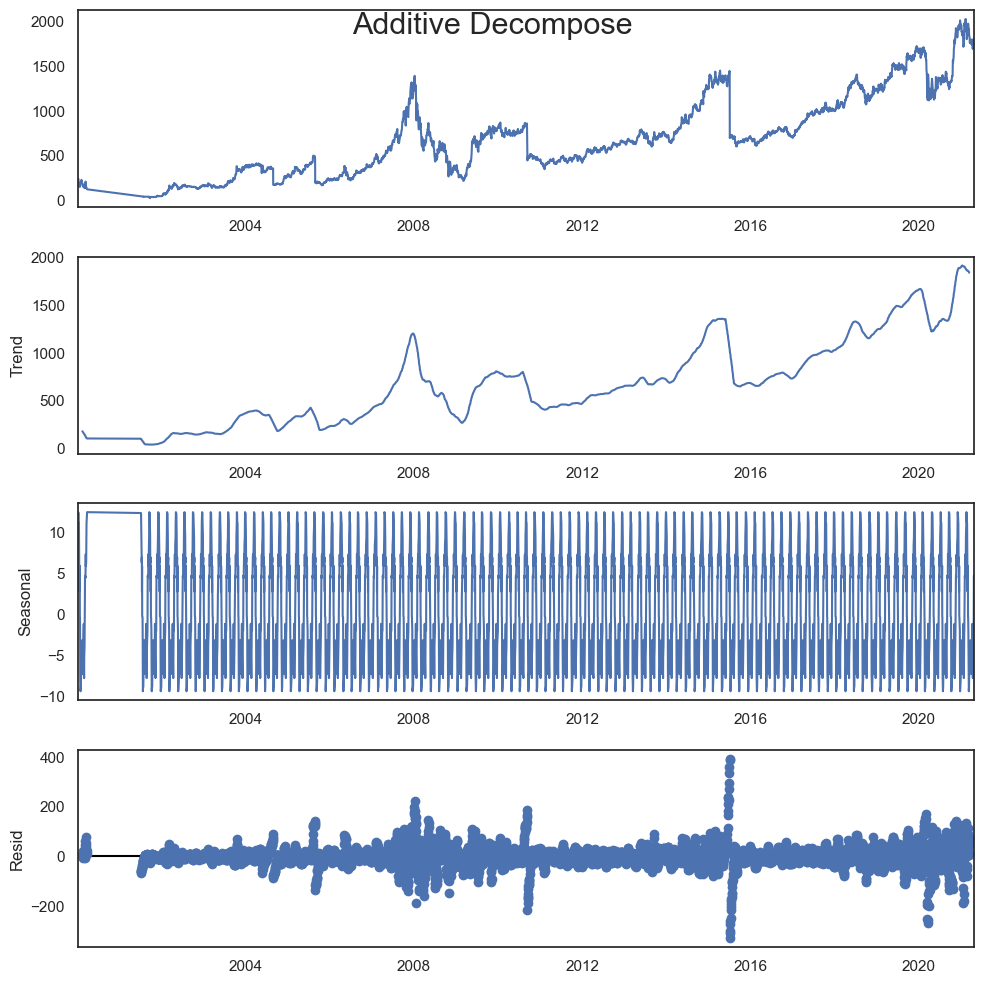

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

plt.rcParams.update({"figure.figsize":(10,10)})
y = df['VWAP'].to_frame()

# Multiplicative Decomoposition
result_mul = seasonal_decompose(y, model='multiplicative',period=52)

# Additive Decomposition
result_add = seasonal_decompose(y, model='additive',period = 52)
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

- Cyclic patter is shown in every 30 days (monthly)

## Coverting Stationary into Non-Stationary

In [28]:
df['vwap_diff'] = df['VWAP'] - df['VWAP'].shift(1)

In [29]:
fig = go.Figure([go.Scatter(x=df.index, y=df.VWAP)])
fig.update_layout(
    autosize=False,
    width = 1000,
    height = 500,
    template = 'simple_white',
    title = 'VWAP over time'
)
fig.show()

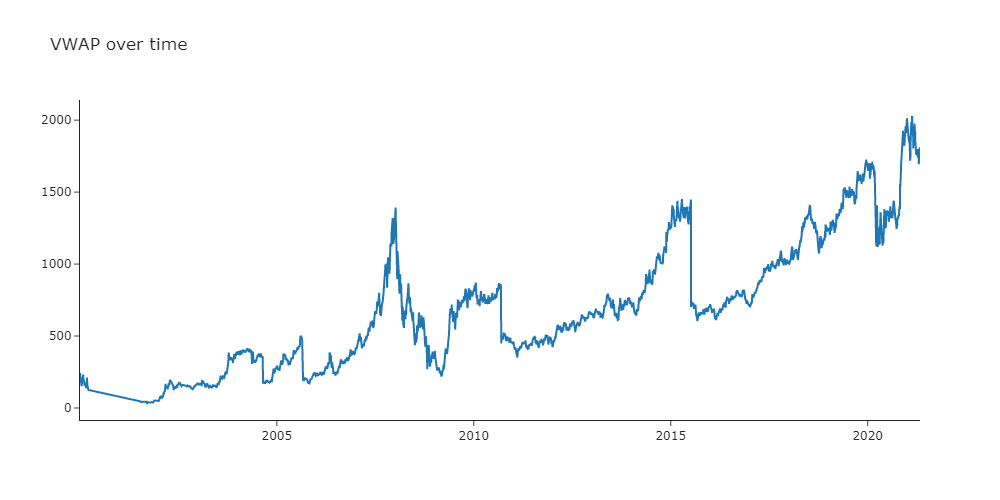

In [30]:
fig = go.Figure([go.Scatter(x=df.index,y=df.vwap_diff)])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    template='simple_white',
    title='Difference VWAP over time ')
fig.show()

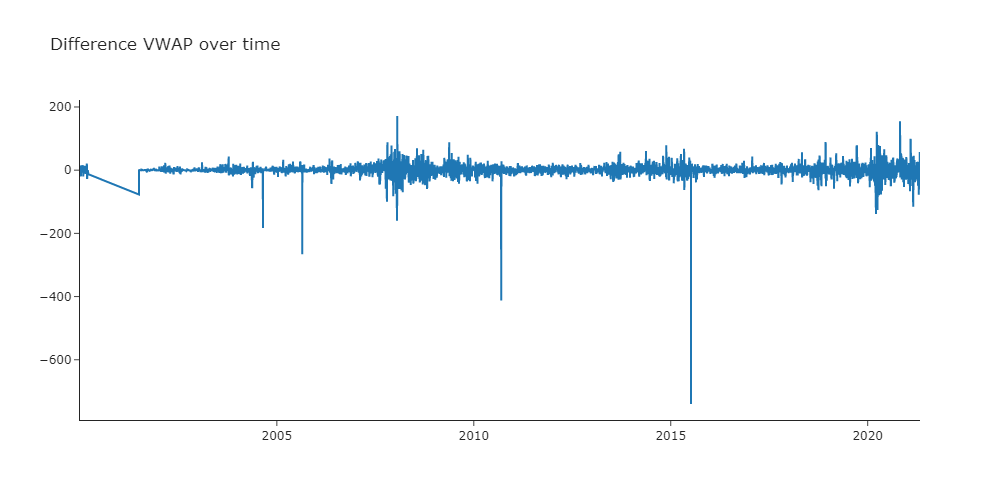

## Plotting ACF and PACF

**Autocorrelation and partial autocorrelation** plots are heavily used in time series analysis and forecasting.

These are plots that graphically summarize the strength of a relationship with an observation in a time series with observations at prior time steps.

Statistical correlation summarizes the strength of the relationship between two variables.

We can calculate the correlation for time series observations with observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.

A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot.

A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

The autocorrelation for an observation and an observation at a prior time step is comprised of both the direct correlation and indirect correlations. These indirect correlations are a linear function of the correlation of the observation, with observations at intervening time steps.

It is these indirect correlations that the partial autocorrelation function seeks to remove. Without going into the math, this is the intuition for the partial autocorrelation.

**A partial autocorrelation** is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

The autocorrelation for an observation and an observation at a prior time step is comprised of both the direct correlation and indirect correlations. These indirect correlations are a linear function of the correlation of the observation, with observations at intervening time steps.

It is these indirect correlations that the partial autocorrelation function seeks to remove. Without going into the math, this is the intuition for the partial autocorrelation.


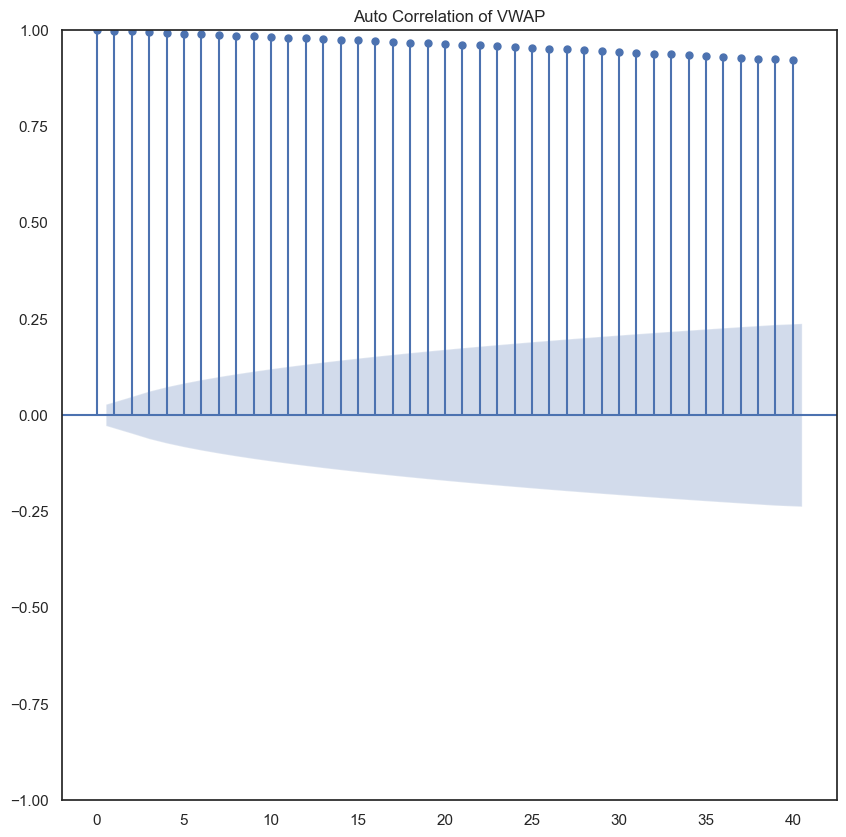

In [31]:
sm.graphics.tsa.plot_acf(df['VWAP'].iloc[1:], lags=40, title='Auto Correlation of VWAP')
plt.show()

/Users/shrutijain/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



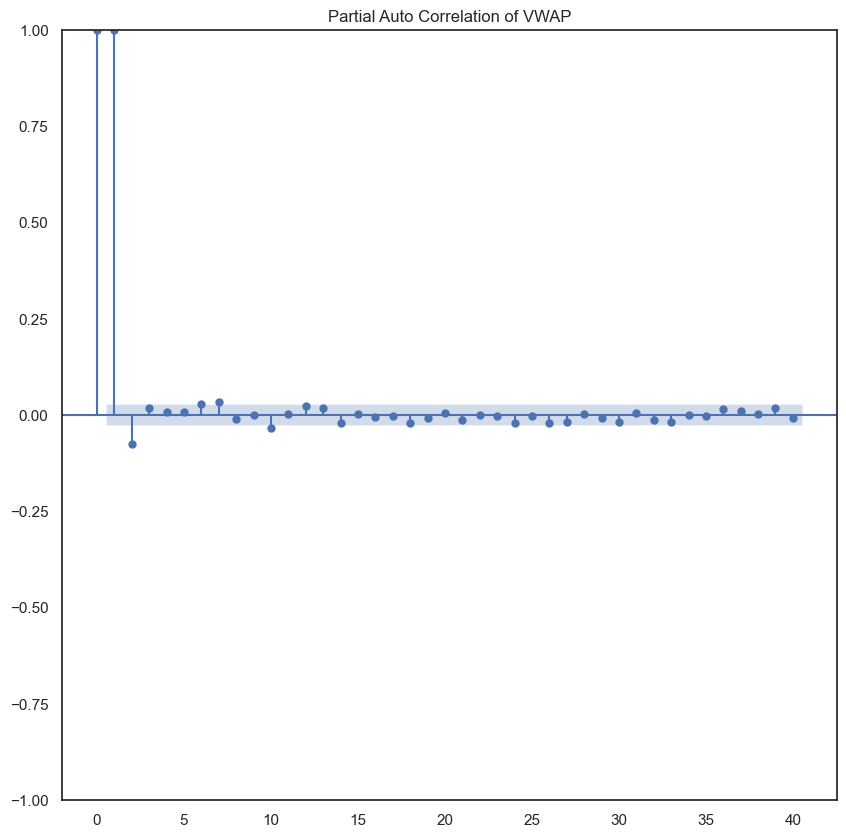

In [32]:
sm.graphics.tsa.plot_pacf(df['VWAP'].iloc[1:], lags=40, title='Partial Auto Correlation of VWAP')
plt.show()

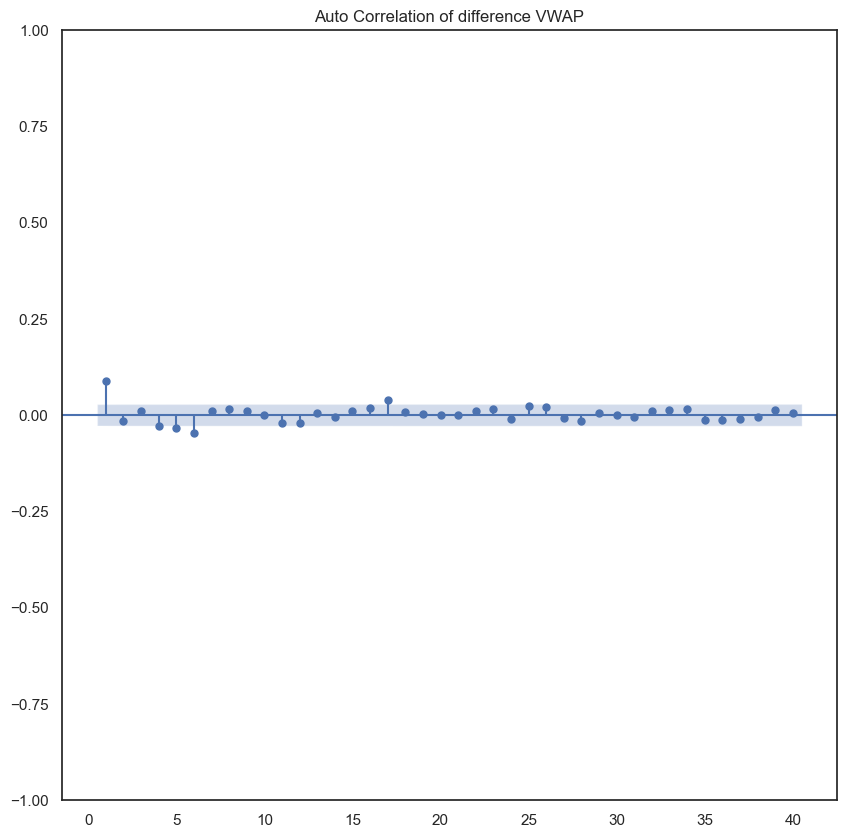

In [33]:
sm.graphics.tsa.plot_acf(df['vwap_diff'].iloc[1:], lags=40, title='Auto Correlation of difference VWAP', zero=False)
plt.show()

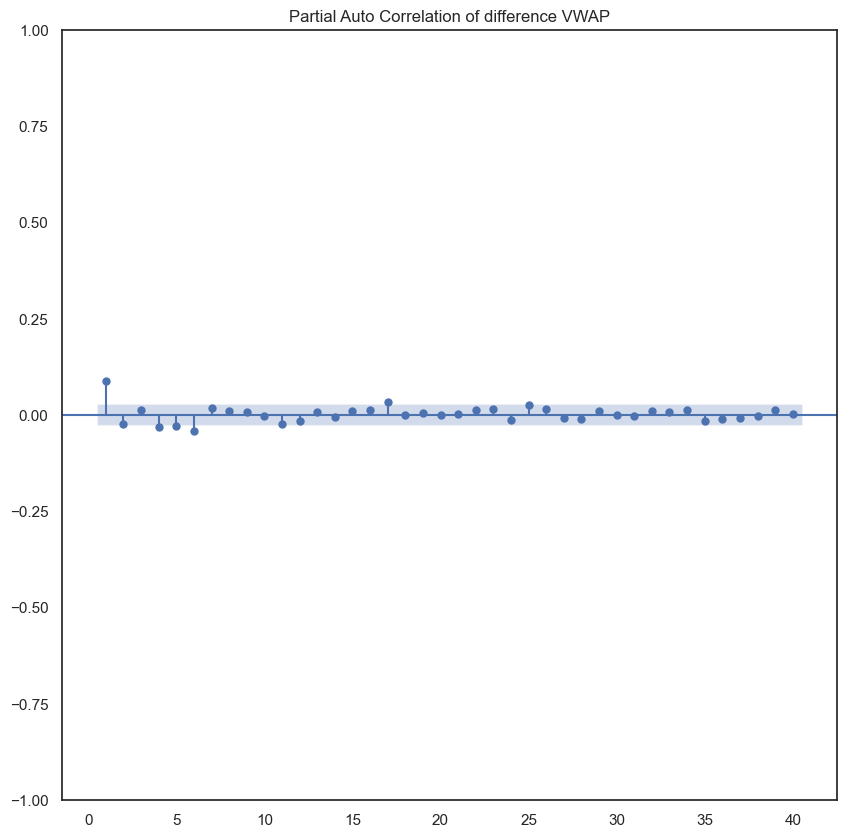

In [34]:
sm.graphics.tsa.plot_pacf(df['vwap_diff'].iloc[1:], lags=40, title='Partial Auto Correlation of difference VWAP', zero=False)
plt.show()

## Feature Engineering

Adding lag values of High, Low, Volume,Turnover, will use three sets of lagged values, one previous day, one looking back 7 days and another looking back 30 days as a proxy for last week and last month metrics.

In [35]:
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,vwap_diff
Date,,,,,,,,,,,,
2000-01-03,KOTAKMAH,EQ,212.35,220.0,229.35,220.00,229.35,229.35,229.13,7086,1.623640e+11,NaN
2000-01-04,KOTAKMAH,EQ,229.35,247.7,247.70,225.25,247.70,246.95,244.12,73681,1.798729e+12,14.99
2000-01-05,KOTAKMAH,EQ,246.95,229.0,240.00,227.20,228.00,228.40,233.75,105799,2.473093e+12,-10.37
2000-01-06,KOTAKMAH,EQ,228.40,235.1,239.00,217.00,224.95,225.90,226.84,40202,9.119546e+11,-6.91
2000-01-07,KOTAKMAH,EQ,225.90,213.0,219.00,207.85,207.85,208.85,209.94,24463,5.135747e+11,-16.90


In [36]:
df = df.reset_index()

In [37]:
lag_features= ["High", "Low", "Volume","Turnover", "Close"]
window1 = 3
window2 = 7
window3 = 30

df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df[lag_features].rolling(window=window3, min_periods=0)

#Mean
df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index().astype(np.float32)
df_mean_30d  = df_rolled_30d.mean().shift(1).reset_index().astype(np.float32)

# Standard Deviation
df_std_3d = df_rolled_3d.std().shift(1).reset_index().astype(np.float32)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)
df_std_30d = df_rolled_30d.std().shift(1).reset_index().astype(np.float32)

In [38]:
for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    df[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    df[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    df[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    df[f"{feature}_std_lag{window3}"] = df_std_30d[feature]
    
df.fillna(df.mean(), inplace=True)

df.set_index("Date", drop=False, inplace=True)

/var/folders/q4/2s68lhzs5nqdpj98_gdtpxtc0000gn/T/ipykernel_1603/2032075673.py:10: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.

/var/folders/q4/2s68lhzs5nqdpj98_gdtpxtc0000gn/T/ipykernel_1603/2032075673.py:10: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [39]:
df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
df["month"] = df.Date.dt.month
df["week"] = df.Date.dt.week
df["day"] = df.Date.dt.day
df["day_of_week"] = df.Date.dt.dayofweek

/var/folders/q4/2s68lhzs5nqdpj98_gdtpxtc0000gn/T/ipykernel_1603/3418294028.py:3: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



In [40]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Close_mean_lag3,Close_mean_lag7,Close_mean_lag30,Close_std_lag3,Close_std_lag7,Close_std_lag30,month,week,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,2000-01-03,KOTAKMAH,EQ,212.35,220.0,229.35,220.00,229.35,229.35,229.13,...,696.088135,695.472900,691.872742,10.377271,16.013405,33.444695,1,1,3,0
2000-01-04,2000-01-04,KOTAKMAH,EQ,229.35,247.7,247.70,225.25,247.70,246.95,244.12,...,229.350006,229.350006,229.350006,10.377271,16.013405,33.444695,1,1,4,1
2000-01-05,2000-01-05,KOTAKMAH,EQ,246.95,229.0,240.00,227.20,228.00,228.40,233.75,...,238.149994,238.149994,238.149994,12.445080,12.445080,12.445080,1,1,5,2
2000-01-06,2000-01-06,KOTAKMAH,EQ,228.40,235.1,239.00,217.00,224.95,225.90,226.84,...,234.899994,234.899994,234.899994,10.446411,10.446411,10.446411,1,1,6,3
2000-01-07,2000-01-07,KOTAKMAH,EQ,225.90,213.0,219.00,207.85,207.85,208.85,209.94,...,233.750000,232.649994,232.649994,11.499674,9.643737,9.643737,1,1,7,4


In [41]:
## Splitting the data into train and validation
df_train = df[df.Date < "2019"]
df_valid = df[df.Date >= "2019"]

exogenous_features = ["High_mean_lag3", "High_std_lag3", "Low_mean_lag3", "Low_std_lag3",
                      "Volume_mean_lag3", "Volume_std_lag3", "Turnover_mean_lag3",
                      "Turnover_std_lag3","High_mean_lag7", "High_std_lag7", "Low_mean_lag7", "Low_std_lag7",
                      "Volume_mean_lag7", "Volume_std_lag7", "Turnover_mean_lag7",
                      "Turnover_std_lag7","High_mean_lag30", "High_std_lag30", "Low_mean_lag30", "Low_std_lag30",
                      "Volume_mean_lag30", "Volume_std_lag30", "Turnover_mean_lag30",
                      "Close_mean_lag3", "Close_mean_lag7","Close_mean_lag30","Close_std_lag3","Close_std_lag7","Close_std_lag30",
                      "Turnover_std_lag30","month","week","day","day_of_week"]

In [42]:
# Auto ARIMA Model
model = auto_arima(df_train.VWAP, exogenous=df_train[exogenous_features],trace=True, error_action="ignore",suppress_warnigs=True)
model.fit(df_train.VWAP, exogenous=df_train[exogenous_features])

forecast = model.predict(n_periods=len(df_valid), exogenous=df_valid[exogenous_features])
df_valid["Forecast_ARIMAX"] = forecast

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=38672.159, Time=2.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=38685.808, Time=0.09 sec


/Users/shrutijain/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning:

invalid value encountered in reciprocal



 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=38668.282, Time=0.12 sec


/Users/shrutijain/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning:

invalid value encountered in reciprocal



 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=38667.567, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=38684.428, Time=0.09 sec


/Users/shrutijain/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning:

invalid value encountered in reciprocal

/Users/shrutijain/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning:

invalid value encountered in reciprocal



 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=38668.168, Time=0.80 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=38668.433, Time=0.33 sec


/Users/shrutijain/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning:

invalid value encountered in reciprocal



 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=38667.003, Time=1.35 sec


/Users/shrutijain/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning:

invalid value encountered in reciprocal



 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=38668.951, Time=2.83 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=38670.404, Time=0.98 sec


/Users/shrutijain/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning:

invalid value encountered in reciprocal



 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=38670.513, Time=0.36 sec


/Users/shrutijain/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning:

invalid value encountered in reciprocal



 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=38671.009, Time=3.17 sec


/Users/shrutijain/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning:

invalid value encountered in reciprocal



 ARIMA(1,1,2)(0,0,0)[0]             : AIC=38665.670, Time=0.68 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=38666.998, Time=0.22 sec


/Users/shrutijain/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning:

invalid value encountered in reciprocal

/Users/shrutijain/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning:

invalid value encountered in reciprocal



 ARIMA(1,1,1)(0,0,0)[0]             : AIC=38666.730, Time=0.48 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=38670.724, Time=0.85 sec


/Users/shrutijain/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning:

invalid value encountered in reciprocal



 ARIMA(1,1,3)(0,0,0)[0]             : AIC=38667.619, Time=1.20 sec


/Users/shrutijain/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning:

invalid value encountered in reciprocal



 ARIMA(0,1,1)(0,0,0)[0]             : AIC=38666.113, Time=0.24 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=38668.965, Time=0.58 sec


/Users/shrutijain/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning:

invalid value encountered in reciprocal



 ARIMA(2,1,1)(0,0,0)[0]             : AIC=38669.068, Time=0.23 sec


/Users/shrutijain/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning:

invalid value encountered in reciprocal



 ARIMA(2,1,3)(0,0,0)[0]             : AIC=38669.669, Time=1.54 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0]          
Total fit time: 18.693 seconds


/Users/shrutijain/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/var/folders/q4/2s68lhzs5nqdpj98_gdtpxtc0000gn/T/ipykernel_1603/1066421346.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4408
Model:               SARIMAX(1, 1, 2)   Log Likelihood              -19328.835
Date:                Fri, 09 Aug 2024   AIC                          38665.670
Time:                        15:07:27   BIC                          38691.234
Sample:                             0   HQIC                         38674.687
                               - 4408                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7859      0.155      5.071      0.000       0.482       1.090
ma.L1         -0.7190      0.156     -4.611      0.000      -1.025      -0.413
ma.L2         -0.0732      0.011     -6.888      0.000      -0.094      -0.052
sigma2       377.6698      0.645    585.116      0.000     376.405     378.935
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          52232264.32
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.34   Skew:                           -15.42
Prob(H) (two-sided):                  0.00   Kurtosis:                       535.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

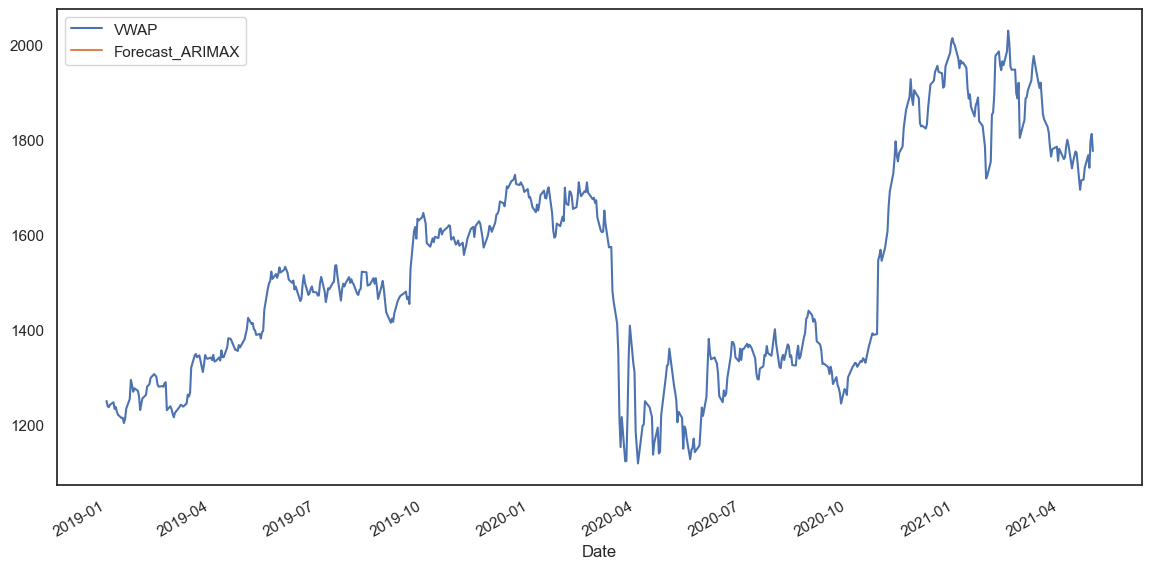

In [44]:
df_valid[["VWAP", "Forecast_ARIMAX"]].plot(figsize=(14,7))

## Analyzing Residuals

In [45]:
residuals = df_valid.VWAP-df_valid.Forecast_ARIMAX

In [46]:
dickyFullerTest((residuals))

MissingDataError: exog contains inf or nans

In [ ]:
residuals.plot()

## Evaluating the Model

In [ ]:
print("RMSE of Auto ARIMAX:", np.sqrt(mean_squared_error(df_valid.VWAP, df_valid.Forecast_ARIMAX)))
print("\nMAE of Auto ARIMAX:", mean_squared_error(df_valid.VWAP, df_valid.Forecast_ARIMAX))

## Model performed very well in this task.